*Sam*
### Programación para Análisis de datos
## Stroke Prediction

Este es un caso donde se analizaran distintos pacientes y sus caracteristicas clinicas. Es un conjunto de datos de análisis con una muestra de 5109 pacientes. El data set se obtuvo de: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

__Sigificado de los campos__

__gender__ : "Male", "Female" or "Other"/ nominal

__age__: age of the patient/ razón

__hypertension__: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension/ nominal

__heart_disease__: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease/ nominal / nominal

__work_type__: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"/ nominal

__Residence_type__: "Rural" or "Urban"/ nominal

__avg_glucose_level__: average glucose level in blood / razón

__bmi__: body mass index /razón

__smoking_status__: "formerly smoked", "never smoked", "smokes" or "Unknown"* / nominal

__stroke__: 1 if the patient had a stroke or 0 if not / nominal 


In [59]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt


In [60]:
# Leemos los datos mediate el encoding utf-8
data = pd.read_csv("stroke.csv", encoding="utf-8")

In [61]:
#Creamos un backup (copia profunda de los datos) de los datos
data_backup= data.copy()

In [62]:
#Get columns
columns=data.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data types

In [63]:
nominal=["gender","hypertension", "heart_disease","work_type","Residence_type", "smoking_status", "stroke"]
ordinal=[]
interval=[]
ratio=["age", "avg_glucose_level","bmi"]

# Convert all nominal to categorical

In [64]:
for i in nominal:
    data[i] = data[i].astype("category")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 235.7+ KB


In [66]:
#Podemos crear nuevos data frames a partir de ciertos datos o categorias

data_stroke = data.loc[data.stroke == 1]
data_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


# Categorical data (Pandas)
In case od NaN data it will mark the category as -1

In [67]:
# Creamos un dato categorico de pandas
c = pd.Categorical(data.gender)
# Podemos ver las categorias de este
c.categories


Index(['Female', 'Male', 'Other'], dtype='object')

In [68]:
#Podemos ver los codigos de categorias de cada dato u observacion
c.codes

array([1, 0, 1, ..., 0, 1, 0], dtype=int8)

# Percentages

In [69]:
pc_gender = data.gender.value_counts(normalize=True)*100
pc_gender

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

# Plot
Donut and pie

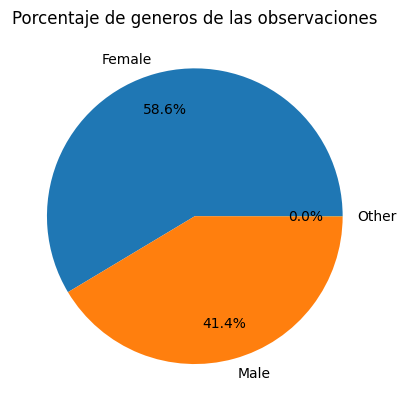

In [70]:
plt.Figure(figsize=(4,3))
plt.title("Porcentaje de generos de las observaciones")
plt.pie(pc_gender, labels = pc_gender.index, autopct="%.1f%%",pctdistance=0.75)
plt.show()



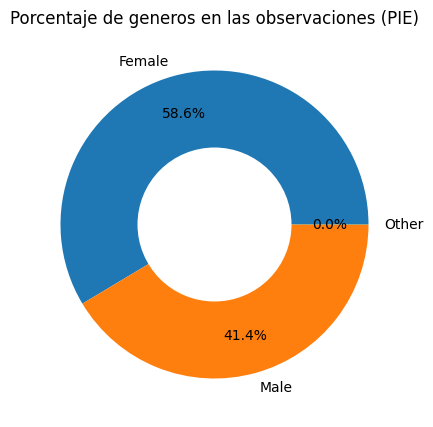

In [71]:
plt.pie(pc_gender, labels=pc_gender.index,
        autopct='%1.1f%%', pctdistance=0.75,
        )
centre_circle = plt.Circle((0,0), 0.5, fc="white")
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de generos en las observaciones (PIE)")

plt.show()

# Histogram

<Axes: >

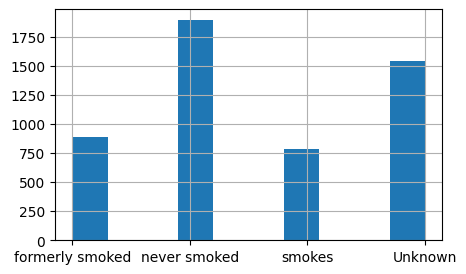

In [72]:
fig, ax = plt.subplots(figsize=(5,3))
data.smoking_status.hist()

- Use histograms for continuous data
- Use bars to discrete data